In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Move the working directory to the project root
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

# Add the parent directory to the path so we can import our custom src module
sys.path.append('..')
from src.data_loader import WWTPDataLoader

# Set plotting style for professional visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.1)

In [2]:
# Ingest data
# Instantiate the loader and ingest the data
loader = WWTPDataLoader(config_path="config/config.yaml")
df = loader.load_raw_data()

print(f"Dataset loaded successfully! Shape: {df.shape}")

2026-02-17 20:33:08,749 - INFO - Configuration loaded successfully from config\config.yaml
2026-02-17 20:33:08,750 - INFO - Loading raw dataset from data\raw\Data-Melbourne_F_fixed.csv...


2026-02-17 20:33:08,775 - INFO - Dropped 'Unnamed: 0' artifact column.
2026-02-17 20:33:08,775 - INFO - Combining ['Year', 'Month', 'Day'] into datetime index...
2026-02-17 20:33:08,798 - INFO - Time-series index set successfully.


Dataset loaded successfully! Shape: (1382, 16)


In [3]:
# Cell 3
print("--- Exact Column Names ---")
print(df.columns.tolist())

print("\n--- First Row of Data (to verify the date format) ---")
display(df.head(1))

--- Exact Column Names ---
['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia', 'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen', 'Average Temperature', 'Maximum temperature', 'Minimum temperature', 'Atmospheric pressure', 'Average humidity', 'Total rainfall', 'Average visibility', 'Average wind speed', 'Maximum wind speed']

--- First Row of Data (to verify the date format) ---


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
Date,,,,,,,,,,,,,,,,
2014-01-01,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5


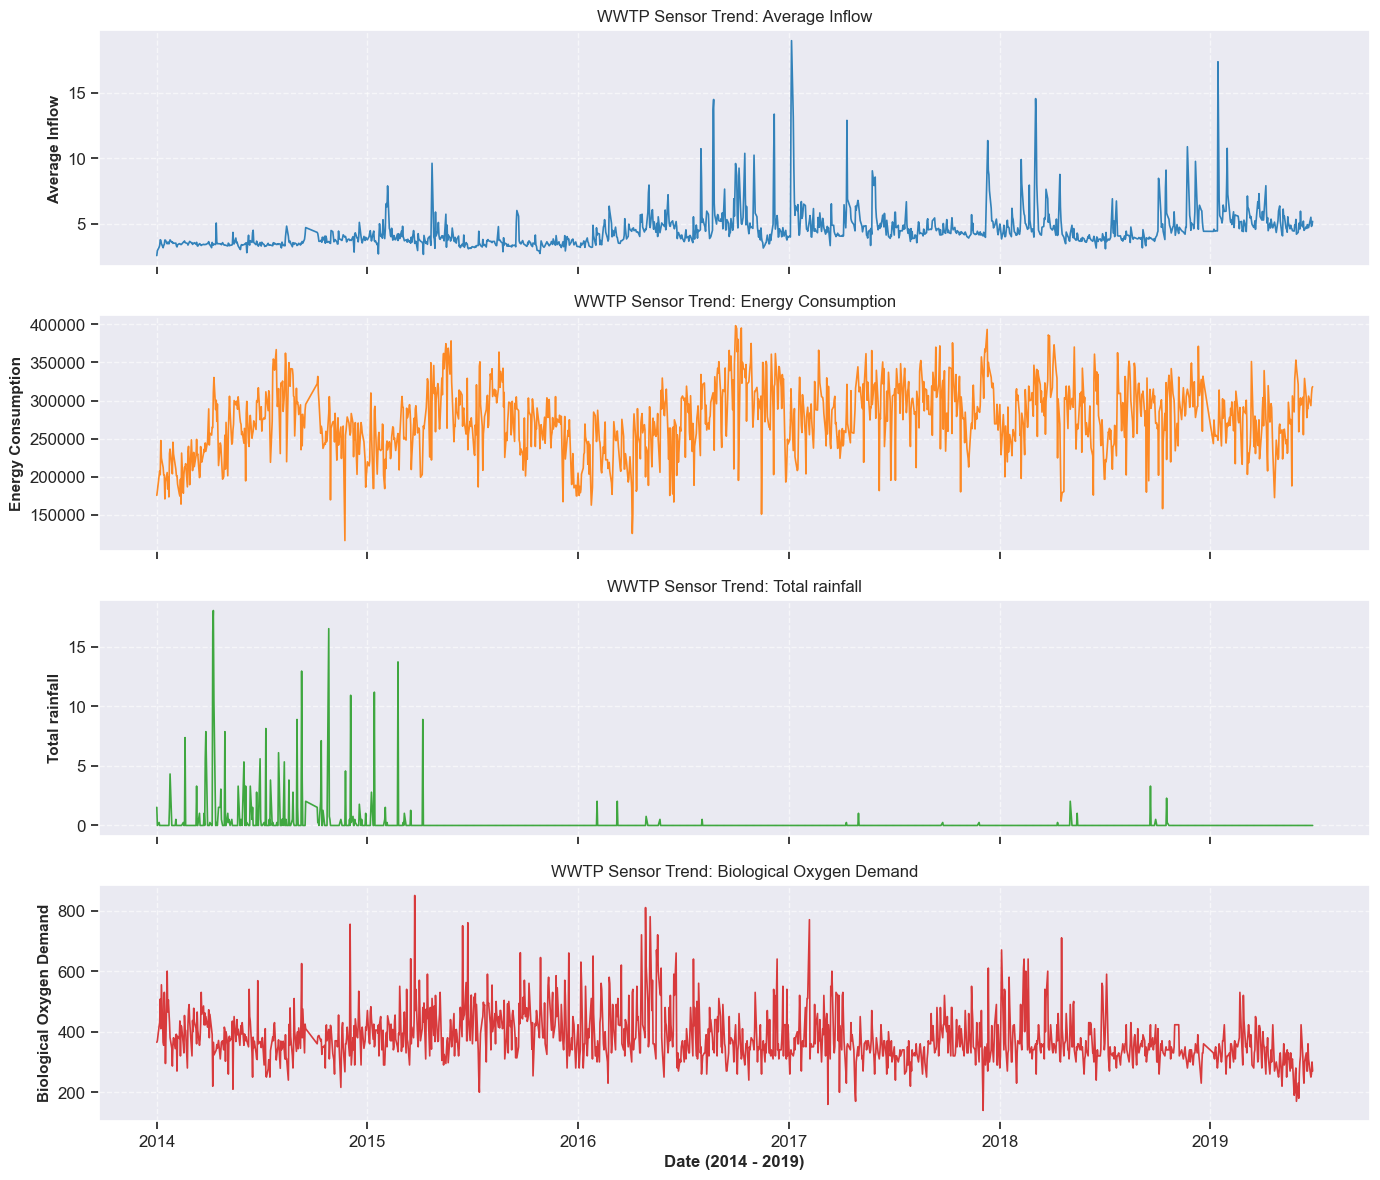

In [4]:

# Dynamically extract the features we care about from the config file
features_dict = loader.config['features']
cols_to_plot = [
    features_dict['hydraulic'][0],   # Average Inflow
    features_dict['energy'][0],      # Energy Consumption
    features_dict['climate'][0],     # Total rainfall
    features_dict['biological'][0]   # Biological Oxygen Demand
]

# Create a beautiful, stacked time-series plot
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(14, 12), sharex=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, col in enumerate(cols_to_plot):
    axes[i].plot(df.index, df[col], color=colors[i], linewidth=1.2, alpha=0.9)
    axes[i].set_ylabel(col, fontsize=11, fontweight='bold')
    axes[i].set_title(f'WWTP Sensor Trend: {col}', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Date (2014 - 2019)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
## from 2014 to mid-2015, the rain gauge is recording normal, highly variable rainfall spikes. 
# But after mid-2015, it almost completely flatlines for 4 years
# Unless Melbourne experienced a literal 4-year apocalyptic drough with zero rain,
# that data is wrong. Either the weather station sensor broke, or the data integration pipeline
# from the airport to the WWTP failed.
# there is a massive jagged spikes reaching over 15 ML/day in 2016 and 2018 which could be
# illegal industrial dumping or sensor glitches

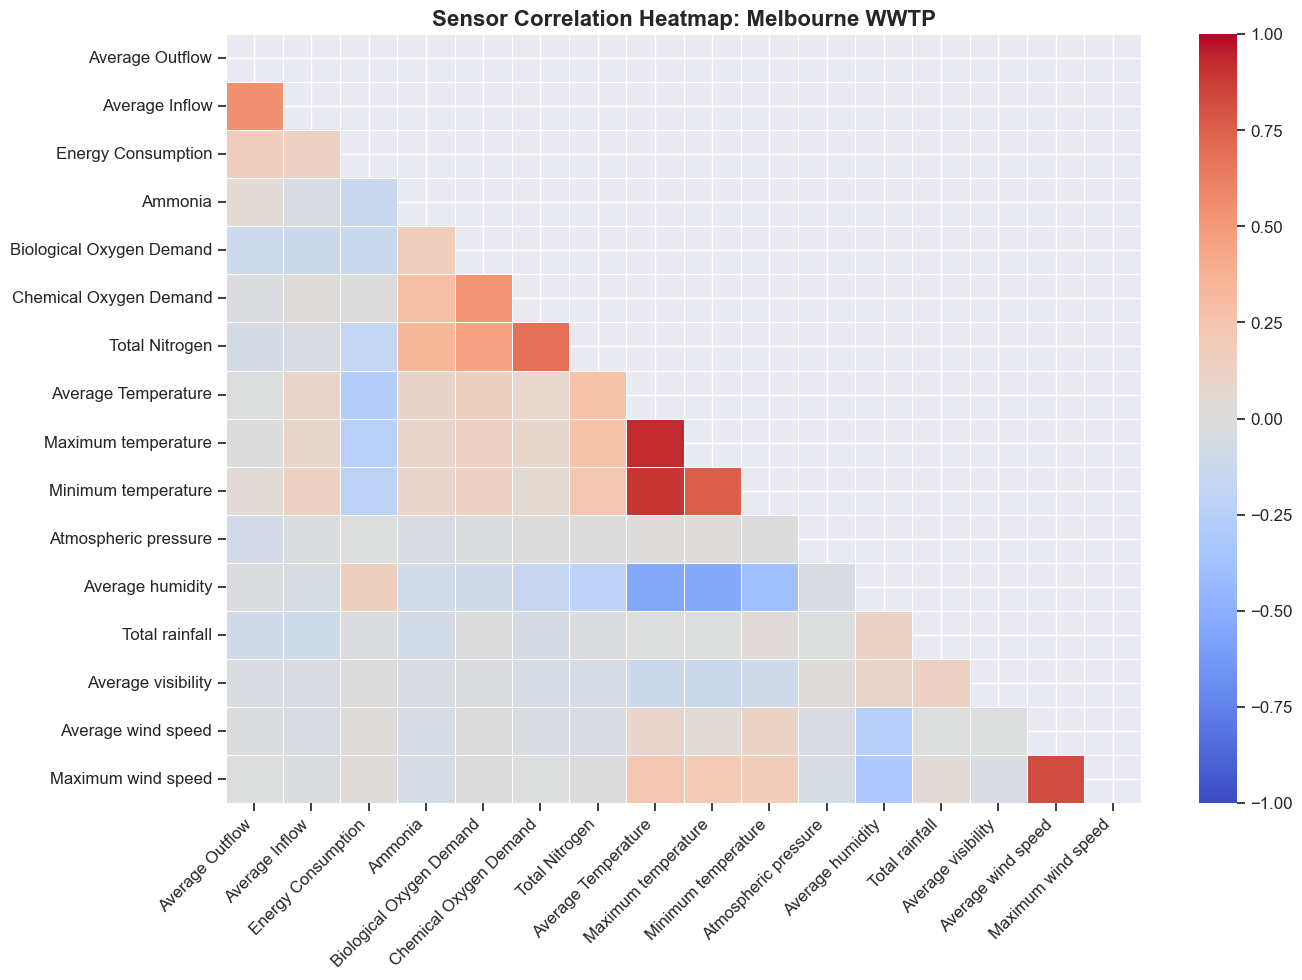

In [5]:

plt.figure(figsize=(14, 10))

# Calculate the correlation matrix for all numeric columns
corr_matrix = df.corr()

# Create a mask to hide the upper triangle (makes it look much cleaner/professional)
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=0.5, linecolor='white')

plt.title("Sensor Correlation Heatmap: Melbourne WWTP", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# chemical reality 
# massive red square (near 1.0 correlation) between average inflow and average
# outflow because what goes into the plant must come out. 
# a strong positive correlation between BOD and COD, which makes perfect sense
# for wastewater chemistry